In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [41]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [42]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [43]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [44]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
Tree = tree.DecisionTreeClassifier()  
Tree.fit(x_train, y_train)   #fitting our model
y_pred=Tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


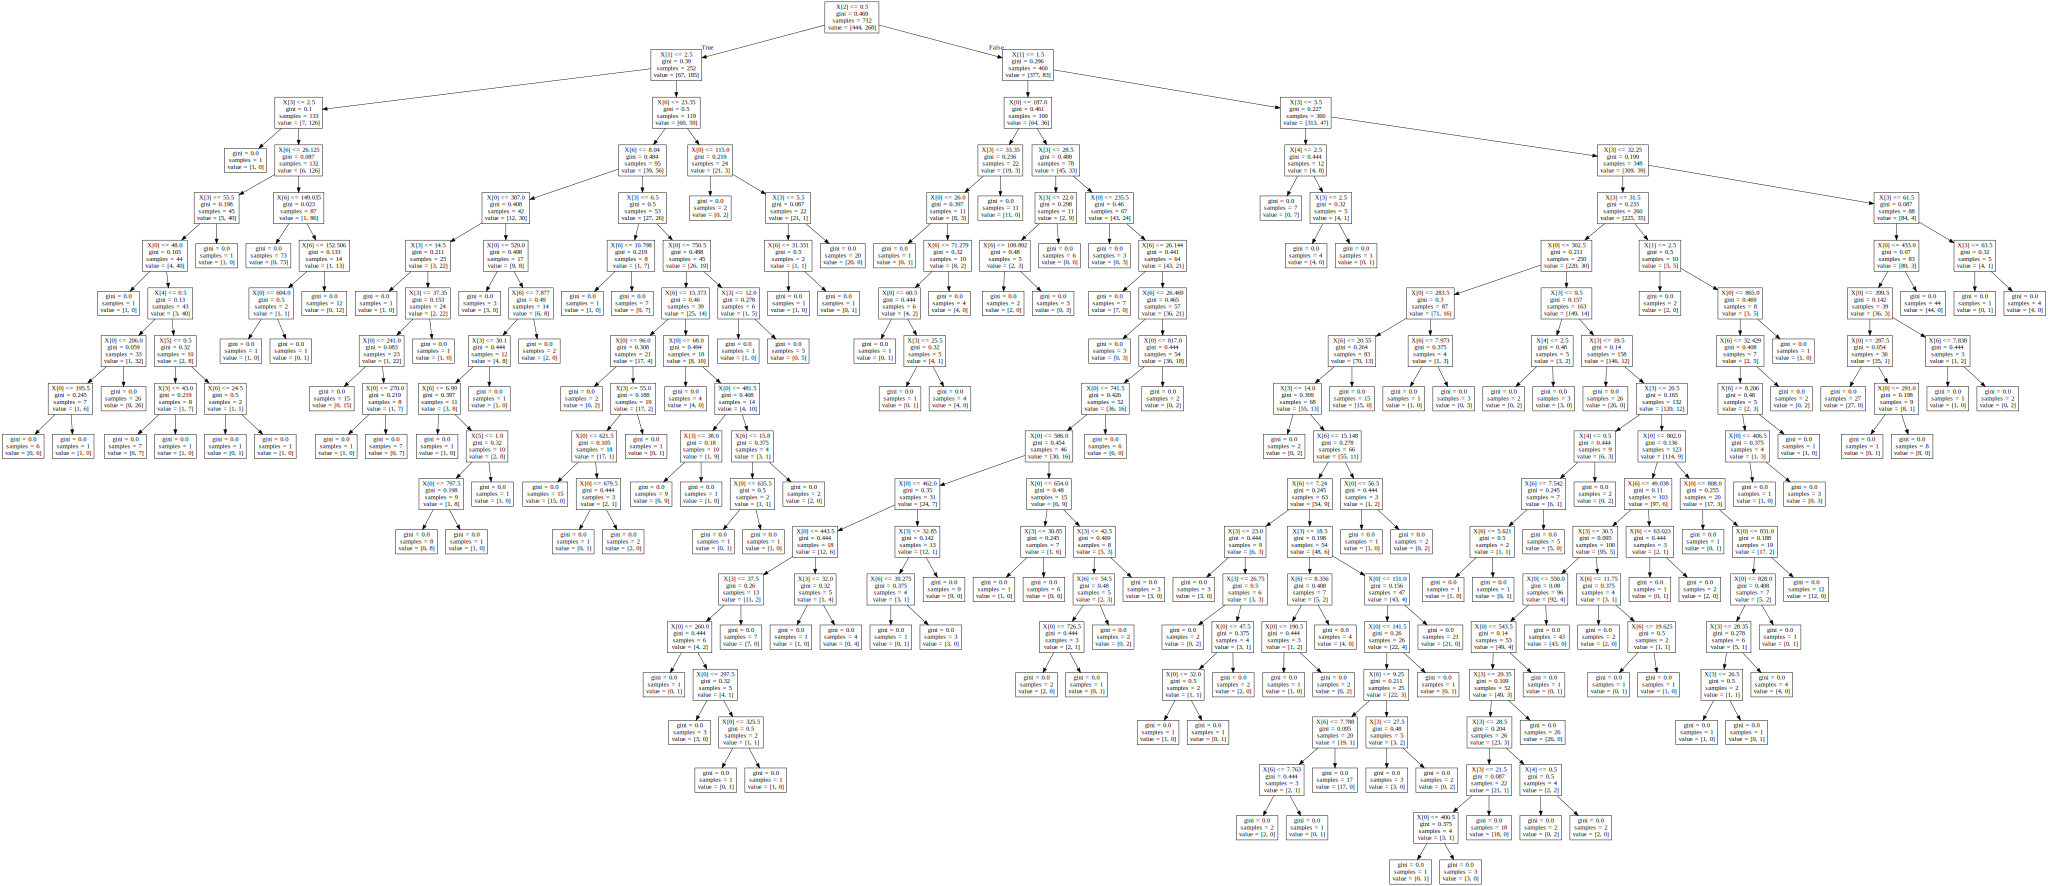

In [45]:
#from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(Tree, out_file=None )
graph = graphviz.Source(dot_data)
graph.render('data')
graph

In [48]:
#applying tree algorithm
Tree = tree.DecisionTreeClassifier(criterion='entropy',splitter='best')  
Tree.fit(x_train, y_train)   #fitting our model
y_pred=Tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


In [ ]:
#chift tab
#When changing the criterion from gini to entropy and spilter from random to best 
#the accrury was 0.78 , it changed to be 0.77 , there is no major difference between both results

# Random Forest 

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [53]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8044692737430168


In [54]:
clf=RandomForestClassifier(n_estimators=7)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8715083798882681


In [ ]:
#When we changed the number of estimator from 10 to 7 , the accuracy has incresed from 0.804 to 0.875